<a href="https://colab.research.google.com/github/DD-SQUARED/University-Physics-Projects/blob/main/Magnetic_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empty DataFrame
Columns: [Year, CR_Proton_Intensity, Magnetic_Field_Strength]
Index: []


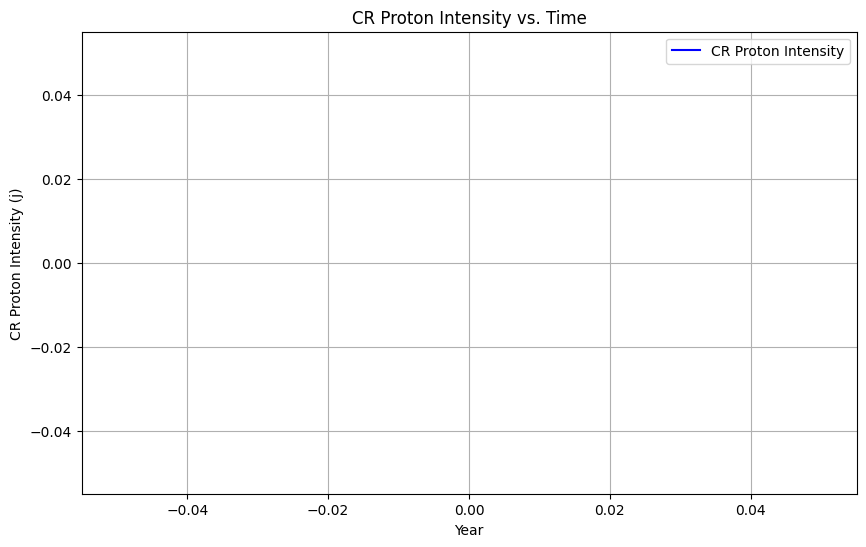

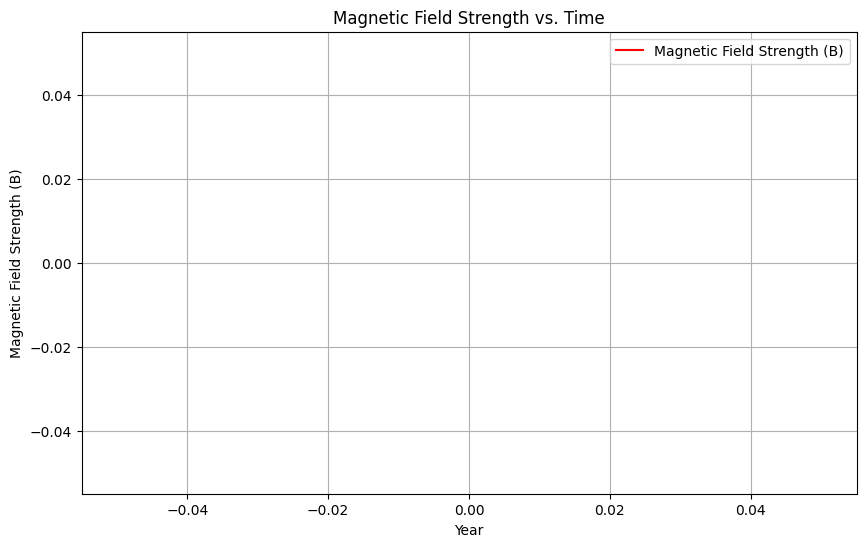

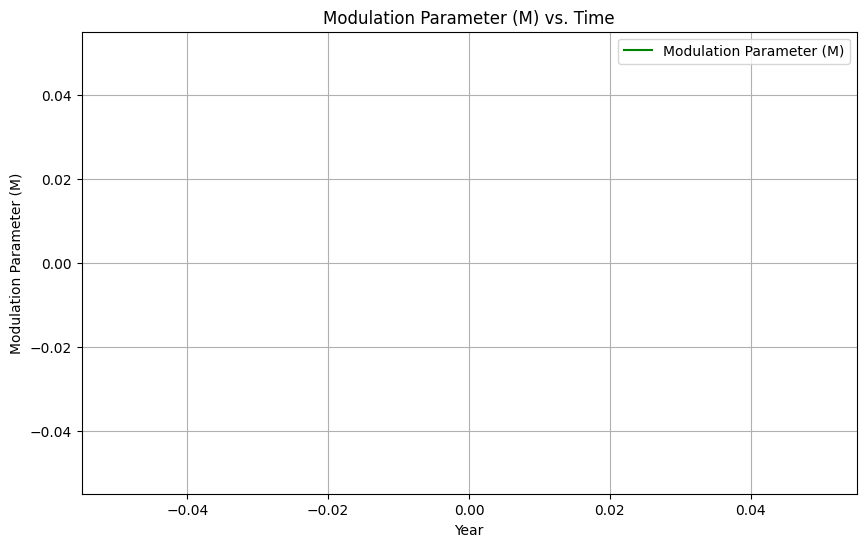

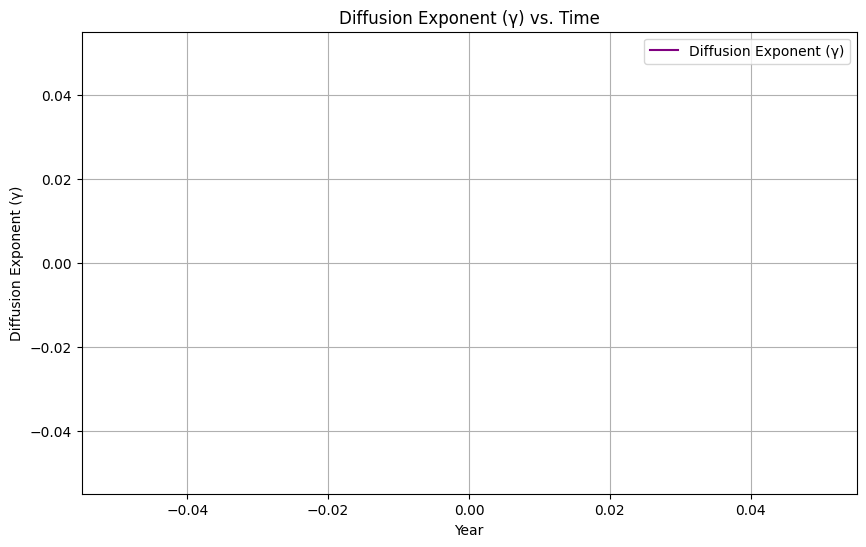

Average Magnetic Field Strength (B): nan


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Data.txt', delimiter='\t')

# Clean the data by removing unnecessary columns and rows with NaN values
# Drop columns with 'Unnamed' in their names
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Drop rows where either 'CR_Proton_Intensity' or 'Magnetic_Field_Strength' is NaN
data.dropna(subset=['CR_Proton_Intensity', 'Magnetic_Field_Strength'], inplace=True)

# Verify the cleaned data
print(data.head())

# Constants
j_b = 1.0  # Replace with actual value from Voyager data at 85 AU
a = 0.00054  # Constant for the diffusion coefficient formula
solar_wind_speed = 600  # km/s
solar_wind_speed_AU_per_s = solar_wind_speed * 1e3 / 1.496e8  # Convert to AU/s

# Calculate M for each year using the formula M = -ln(j/j_b)
data['M'] = -np.log(data['CR_Proton_Intensity'] / j_b)

# Calculate the average magnetic field strength (B)
avg_B = data['Magnetic_Field_Strength'].mean()

# Calculate gamma for each year
data['gamma'] = np.log(a * data['Magnetic_Field_Strength']) / np.log(solar_wind_speed_AU_per_s)

# Plot Graph 1: CR Proton Intensity vs. Time
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['CR_Proton_Intensity'], label='CR Proton Intensity', color='blue')
plt.title('CR Proton Intensity vs. Time')
plt.xlabel('Year')
plt.ylabel('CR Proton Intensity (j)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Graph 2: Magnetic Field Strength vs. Time
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Magnetic_Field_Strength'], label='Magnetic Field Strength (B)', color='red')
plt.title('Magnetic Field Strength vs. Time')
plt.xlabel('Year')
plt.ylabel('Magnetic Field Strength (B)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Graph 3: Modulation Parameter vs. Time
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['M'], label='Modulation Parameter (M)', color='green')
plt.title('Modulation Parameter (M) vs. Time')
plt.xlabel('Year')
plt.ylabel('Modulation Parameter (M)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Graph 4: Diffusion Exponent vs. Time
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['gamma'], label='Diffusion Exponent (γ)', color='purple')
plt.title('Diffusion Exponent (γ) vs. Time')
plt.xlabel('Year')
plt.ylabel('Diffusion Exponent (γ)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate and print averages
avg_gamma = data['gamma'].mean()
print(f"Average Magnetic Field Strength (B): {avg_B}")
